## Introduction
Full Adder experiment:
* forward direction fully specified
* backward direction fully specified (with garbage bits from first run)
* backward direction partially specified (without garbage bits)
* use classical bits as inputs in forward case
* use classical bits as required outputs in backward case

questions:
* how to reverse a circuit in qiskit?
* does the partial run end in a superposition of all valid states?


In [6]:
%matplotlib inline
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import *

# Create a 4 qubit Quantum Circuit
circ = QuantumCircuit(4,4)

# forward direction
circ.h(2)
circ.cx(2, 0)
circ.cx(2, 1)

# Measure
circ.barrier(range(4))
circ.measure(range(4),range(4))

circ.draw()

┌───┐      ░ ┌─┐         
q_0: ─────┤ X ├──────░─┤M├─────────
          └─┬─┘┌───┐ ░ └╥┘┌─┐      
q_1: ───────┼──┤ X ├─░──╫─┤M├──────
     ┌───┐  │  └─┬─┘ ░  ║ └╥┘┌─┐   
q_2: ┤ H ├──■────■───░──╫──╫─┤M├───
     └───┘           ░  ║  ║ └╥┘┌─┐
q_3: ────────────────░──╫──╫──╫─┤M├
                     ░  ║  ║  ║ └╥┘
c: 4/═══════════════════╩══╩══╩══╩═
                        0  1  2  3

{'000': 546, '111': 478}


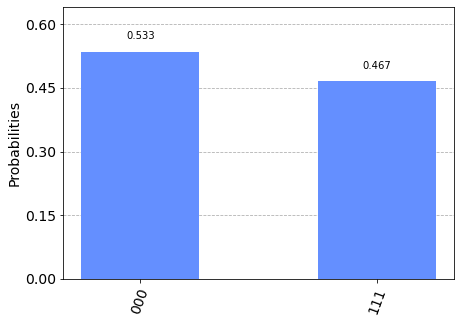

In [4]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(circ, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
plot_histogram(counts)